In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 


In [12]:
# To derive Test results
def displayResults(pred_y, test_y):
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0
    size = len(test_y)
    for i in range(size):
        if test_y[i] == pred_y[i]:
            if test_y[i] == 2: 
                true_negative += 1
            else: 
                true_positive += 1
        elif y[i] != pred_y[i]:
            if pred_y[i] == 2: 
                false_negative += 1 
            else: 
                false_positive += 1
                
    # Accuracy
    print("Accuracy: ", (true_positive+true_negative)/size)
    # Precision
    precision = true_positive/(true_positive + false_positive)
    print("Precision: ", precision)
    # Recall
    recall = true_positive/(true_positive + false_negative)
    print("Recall: ", recall)
    # F-score
    print("F-Score: ", 2*precision*recall/(precision+recall))

Columns with High Correlation:  Index(['Unnamed: 0', 'galex_objid', 'sdss_objid', 'u', 'extinction_u',
       'nuv_mag', 'class', 'spectrometric_redshift', 'nuv-u', 'u-g', 'g-r',
       'i-z', 'fuv-nuv', 'fuv-u', 'pred'],
      dtype='object')

Columns with High Correlation:  Index(['Unnamed: 0', 'galex_objid', 'sdss_objid', 'u', 'extinction_u',
       'nuv_mag', 'class', 'spectrometric_redshift', 'nuv-u', 'u-g', 'g-r',
       'fuv-nuv', 'fuv-u', 'pred'],
      dtype='object')

Columns with High Correlation:  Index(['Unnamed: 0', 'galex_objid', 'sdss_objid', 'u', 'extinction_u',
       'nuv_mag', 'class', 'spectrometric_redshift', 'nuv-u', 'u-g', 'g-r',
       'fuv-nuv', 'fuv-u', 'pred'],
      dtype='object')

Columns with High Correlation:  Index(['Unnamed: 0', 'galex_objid', 'sdss_objid', 'u', 'g', 'extinction_u',
       'nuv_mag', 'class', 'spectrometric_redshift', 'nuv-u', 'nuv-g', 'u-g',
       'g-r', 'i-z', 'pred'],
      dtype='object')



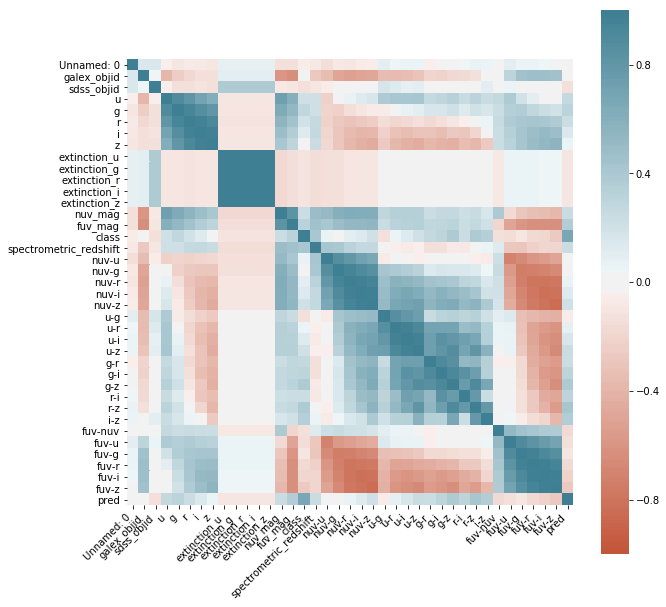

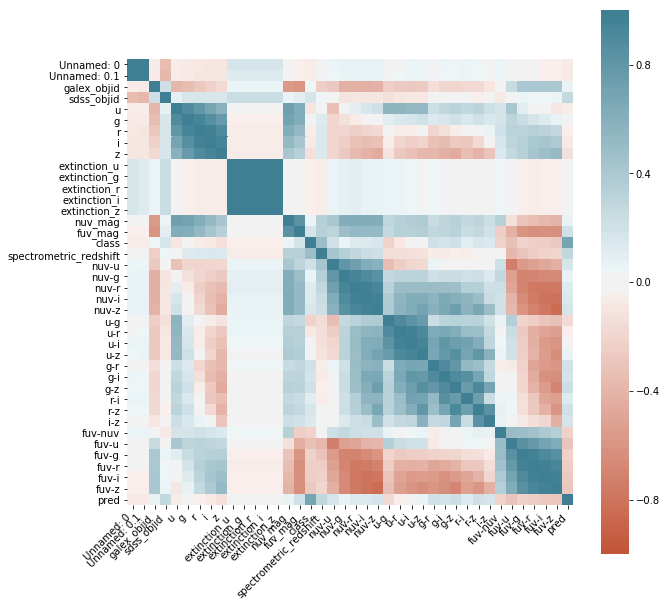

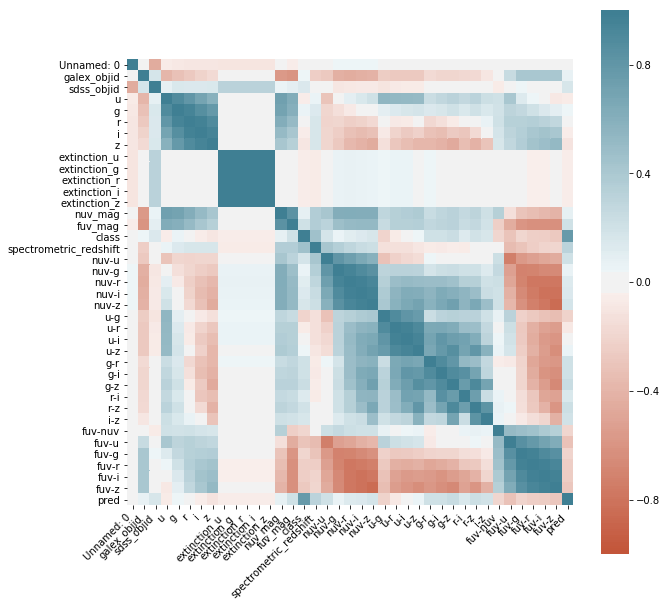

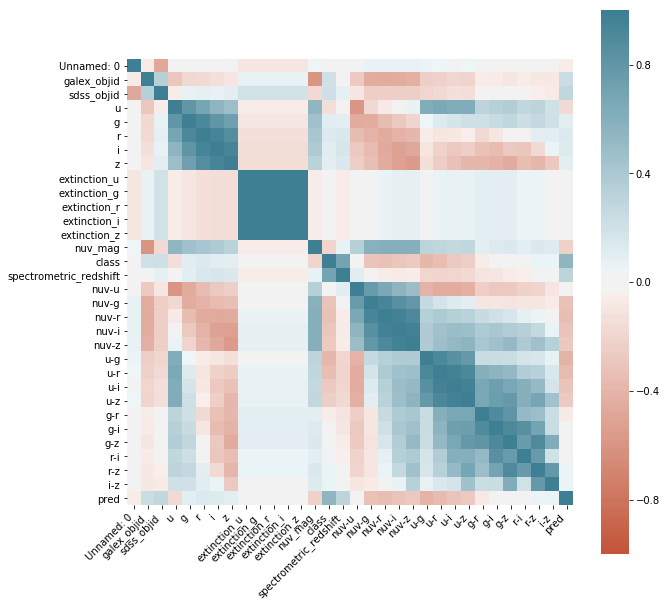

In [40]:
def visualize_correlation_matrix(df):
    corr = df.corr()
    f, ax = plt.subplots(figsize =(10, 10)) 
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

    threshold = 0.80
    for i in range(len(corr.columns)):
        columns_to_delete = set()
        for j in range(i):
            if((abs(corr.iloc[i,j])>=threshold) and (corr.columns[j] not in columns_to_delete)):
                columns_to_delete.add(corr.columns[i])
                if(corr.columns[i] in df.columns):
                    del df[corr.columns[i]]
    print("Columns with High Correlation: ", df.columns)
    print()

df = pd.read_csv("C:\\Users\\Asus\\Documents\\Sem 5\\ML\\MiniProject1_SectionE_G\\catalog1\\cat1.csv")
visualize_correlation_matrix(df)

df = pd.read_csv("C:\\Users\\Asus\\Documents\\Sem 5\\ML\\MiniProject1_SectionE_G\\catalog2\\cat2.csv")
visualize_correlation_matrix(df)

df = pd.read_csv("C:\\Users\\Asus\\Documents\\Sem 5\\ML\\MiniProject1_SectionE_G\\catalog3\\cat3.csv")
visualize_correlation_matrix(df)

df = pd.read_csv("C:\\Users\\Asus\\Documents\\Sem 5\\ML\\MiniProject1_SectionE_G\\catalog4\\cat4.csv")
visualize_correlation_matrix(df)


In [2]:
class DecisionTreeRegressor:
  
    def fit(self, X, y, min_leaf = 5):
        self.dtree = Node(X, y, np.array(np.arange(len(y))), min_leaf)
        return self
  
    def predict(self, X):
        return self.dtree.predict(X.values)

class Node:

    def __init__(self, x, y, idxs, min_leaf=5):
        self.x = x 
        self.y = y
        self.idxs = idxs 
        self.min_leaf = min_leaf
        self.row_count = len(idxs)
        self.col_count = x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for c in range(self.col_count): self.find_better_split(c)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        self.lhs = Node(self.x, self.y, self.idxs[lhs], self.min_leaf)
        self.rhs = Node(self.x, self.y, self.idxs[rhs], self.min_leaf)
        
    def find_better_split(self, var_idx):
      
        x = self.x.values[self.idxs, var_idx]

        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]
            if rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf: continue

            curr_score = self.find_score(lhs, rhs)
            if curr_score < self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]
                
    def find_score(self, lhs, rhs):
        y = self.y[self.idxs]
        lhs_std = y[lhs].std()
        rhs_std = y[rhs].std()
        return lhs_std * lhs.sum() + rhs_std * rhs.sum()
                
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]
                
    @property
    def is_leaf(self): return self.score == float('inf')                

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)
    def predict(self, x):
        return np.array([round(self.predict_row(xi)) for xi in x])

def predict_row(self, xi):
    if self.is_leaf: return self.val
    node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
    return node.predict_row(xi)

In [17]:
# For catalog 2
r1="cat1.csv"
k=4
r=open(r1,"r")
m=r.readlines()
# print(m)
first=m[0]
def k_fold(i,j,k,m):
    t=m
    print(k)
    w1=open("testt"+k+".csv","w")
    w2=open("traint"+k+".csv","w")
    test=open("test.csv","w")
    train=open("train.csv","w")
    w1.write(first)
    w2.write(first)
    train.write(first)
    test.write(first)
    for m in t[int(i+1):int(j+1)]:
        w1.write(m)
        test.write(m)
    for n in t[1:int(i)]:
        w2.write(n)
        train.write(n)
    for n in t[int(j+1):]:
        w2.write(n)
        train.write(n)
    w1.close()
    w2.close()
    test.close()
    train.close()
for i in range(0,k):
    #print(((i*1/k)*len(m))//1,(((i+1)*1/k)*len(m))//1,str(i),len(m))
    k_fold(((i*1/k)*len(m))//1,(((i+1)*1/k)*len(m))//1,str(i),m)
    df = pd.read_csv("train.csv")
    y = df["class"]
    #df.drop([df.columns[[0]],'Unnamed: 0', 'galex_objid', 'sdss_objid', 'u', 'extinction_u', 'class',
    #   'spectrometric_redshift', 'nuv-u', 'u-g', 'g-r', 'fuv-nuv', 'fuv_mag', 'fuv-u','fuv-g', 'fuv-r','fuv-i','fuv-z',
    #     'pred'], axis = 1, inplace = True)
    
#     df.drop([df.columns[[0]], 'galex_objid', 'sdss_objid', 'u', 'extinction_u', 'class','spectrometric_redshift', 'nuv-u', 'u-g', 'g-r', 'fuv-nuv', 'fuv_mag', 'fuv-u','fuv-g', 'fuv-r','fuv-i','fuv-z','pred'], axis = 1, inplace = True)
    df1=pd.read_csv("test.csv")
    y1=df1["class"]
#     df1.drop([df1.columns[[0]], 'galex_objid', 'sdss_objid', 'u', 'extinction_u', 'class','spectrometric_redshift', 'nuv-u', 'u-g', 'g-r', 'fuv-nuv', 'fuv_mag', 'fuv-u','fuv-g', 'fuv-r','fuv-i','fuv-z','pred'], axis = 1, inplace = True)
    
    df.drop(["spectrometric_redshift"], axis = 1, inplace = True)
    df.drop(["class"], axis = 1, inplace = True)
    df.drop(["galex_objid"], axis = 1, inplace = True)
    df.drop(["sdss_objid"], axis = 1, inplace = True)
    df.drop(["pred"], axis = 1, inplace = True)
    df.drop(['fuv_mag'], axis = 1, inplace = True)
    df.drop(['fuv-nuv'], axis = 1, inplace = True)
    df.drop(['fuv-u',], axis = 1, inplace = True)
    df.drop(['fuv-g'], axis = 1, inplace = True)
    df.drop(['fuv-r'], axis = 1, inplace = True)
    df.drop(['fuv-i'], axis = 1, inplace = True)
    df.drop(['fuv-z'], axis = 1, inplace = True)
    df1.drop(["spectrometric_redshift"], axis = 1, inplace = True)
    df1.drop(["class"], axis = 1, inplace = True)
    df1.drop(["galex_objid"], axis = 1, inplace = True)
    df1.drop(["sdss_objid"], axis = 1, inplace = True)
    df1.drop(["pred"], axis = 1, inplace = True)
    df1.drop(['fuv_mag'], axis = 1, inplace = True)
    df1.drop(['fuv-nuv'], axis = 1, inplace = True)
    df1.drop(['fuv-u',], axis = 1, inplace = True)
    df1.drop(['fuv-g'], axis = 1, inplace = True)
    df1.drop(['fuv-r'], axis = 1, inplace = True)
    df1.drop(['fuv-i'], axis = 1, inplace = True)
    df1.drop(['fuv-z'], axis = 1, inplace = True)
    #df1.drop([df1.columns[[0]],'Unnamed: 0', 'galex_objid', 'sdss_objid', 'u', 'extinction_u', 'class',
    #   'spectrometric_redshift', 'nuv-u', 'u-g', 'g-r', 'fuv-nuv', 'fuv_mag', 'fuv-u','fuv-g', 'fuv-r','fuv-i','fuv-z',
    #     'pred'], axis = 1, inplace = True)
    X=df
    #print(X)
    X_test=df1
    Regressor = DecisionTreeRegressor()
    Regressor.fit(X, y)
    preds = Regressor.predict(X_test)
    
    #print(preds)
    displayResults(list(preds),list(y1))
    l=0
    c=0
    for i,j in zip(list(y1), list(preds)):
        if(i==j):
            l=l+1
            c=c+1
        else:
            l=l+1
    print(c/l)

0
     Unnamed: 0          u          g          r          i          z  \
0           162  21.966974  21.576694  21.484484  21.598267  21.088509   
1           163  20.989811  20.485813  20.410772  20.309483  20.148245   
2           164  20.932770  20.050819  20.109772  20.162153  19.678074   
3           165  20.120888  19.917511  20.216862  20.455336  20.815262   
4           166  22.372805  21.909534  21.728661  21.491177  21.129225   
5           167  20.190371  19.799515  19.691732  19.668760  19.514429   
6           168  20.190371  19.799515  19.691732  19.668760  19.514429   
7           169  20.190371  19.799515  19.691732  19.668760  19.514429   
8           170  20.190371  19.799515  19.691732  19.668760  19.514429   
9           171  20.685545  20.102579  19.935820  19.891088  19.960505   
10          172  20.438766  20.163403  20.152859  20.233858  19.950691   
11          173  21.896809  21.165094  20.724043  19.935261  19.703575   
12          174  17.507212  16.21180

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 1]
Accuracy:  0.9320987654320988
Precision:  0.9617834394904459
Recall:  1.0
F-Score:  0.9805194805194806
0.9320987654320988
1
     Unnamed: 0          u          g          r          i          z  \
0             0  18.286291  16.968243  16.334318  16.039885  15.857203   
1             1  22.734962  21.516233  20.178501  19.238029  18.809675   
2             2  21.223398  21.143623  21.149973  20.998989  21.145853   
3             3  21.771444  21.636995  21.564974  21.476393  21.266085   
4             4  22.767988  22.018591  21.658953  21.098751  20.734152   
5             5  21.144341  21.066351  21.114285  20.744371  20.674231   
6             6  21.032520  

[1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy:  0.9631901840490797
Precision:  0.9874213836477987
Recall:  1.0
F-Score:  0.9936708860759493
0.9631901840490797
2
     Unnamed: 0          u          g          r          i          z  \
0             0  18.286291  16.968243  16.334318  16.039885  15.857203   
1             1  22.734962  21.516233  20.178501  19.238029  18.809675   
2             2  21.223398  21.143623  21.149973  20.998989  21.145853   
3             3  21.771444  21.636995  21.564974  21.476393  21.266085   
4             4  22.767988  22.018591  21.658953  21.098751  20.734152   
5             5  21.144341  21.066351  21.114285  20.744371  20.674231   
6             6  21.032520

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 0 1 1 1 1 0]
Accuracy:  0.9382716049382716
Precision:  0.9806451612903225
Recall:  1.0
F-Score:  0.990228013029316
0.9382716049382716
3
     Unnamed: 0          u          g          r          i          z  \
0             0  18.286291  16.968243  16.334318  16.039885  15.857203   
1             1  22.734962  21.516233  20.178501  19.238029  18.809675   
2             2  21.223398  21.143623  21.149973  20.998989  21.145853   
3             3  21.771444  21.636995  21.564974  21.476393  21.266085   
4             4  22.767988  22.018591  21.658953  21.098751  20.734152   
5             5  21.144341  21.066351  21.114285  20.744371  20.674231   
6             6  21.032520  2

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
Accuracy:  0.9444444444444444
Precision:  0.9870967741935484
Recall:  1.0
F-Score:  0.9935064935064934
0.9444444444444444


In [2]:
from sklearn.metrics import accuracy_score
print(accuracy_score(list(y1), list(preds)))
l=0
c=0
for i,j in zip(list(y1), list(preds)):
    if(i==j):
        l=l+1
        c=c+1
    else:
        l=l+1
print(c/l)

from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd
cat=open("cat3.csv")
cat3=[]
l=list(map(lambda x: x.split(","),cat.readlines()))
l=l[1:]
for i in range(len(l)):
    cat3.append([])
    for j in range(1,len(l[i])):
        if(j != 15 and  j!=16 and j!=37):
            cat3[i].append(float(l[i][j].strip()))
#l=list(map(lambda x: int(x.strip()),l))
npa = np.asarray(cat3, dtype=np.float32)
gmm = GaussianMixture(n_components = 3)
gmm.fit(pd.DataFrame(npa)) 
labels = gmm.predict(npa) 
from sklearn.metrics import accuracy_score
cat=open("cat3.csv")
tru=list(map(lambda x:int(x.split(",")[15]),cat.readlines()[1:]))
accuracy_score(tru, labels)


NameError: name 'y1' is not defined